In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

<IPython.core.display.Javascript object>

In [5]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

heart_df = pd.read_sql_query("select * from heartdisease", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

In [6]:
heart_df = heart_df.drop(index=0, axis=0)
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [8]:
heart_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


<IPython.core.display.Javascript object>

In [15]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.394920,0.687874,0.876481,1.612596,0.758372,-0.412968,1.020113,-1.818840,1.431958,0.400906,0.661249,2.500487,-0.862438
1,1.394920,0.687874,0.876481,-0.662326,-0.342633,-0.412968,1.020113,-0.900807,1.431958,1.350164,0.661249,1.429357,1.168411
2,-1.929113,0.687874,-0.173905,-0.093596,0.063000,-0.412968,-0.993444,1.634713,-0.698344,2.126829,2.298111,-0.712905,-0.862438
3,-1.485908,-1.453754,-1.224290,-0.093596,-0.825530,-0.412968,1.020113,0.978975,-0.698344,0.314610,-0.975613,-0.712905,-0.862438
4,0.176108,0.687874,-1.224290,-0.662326,-0.207422,-0.412968,-0.993444,1.241270,-0.698344,-0.203167,-0.975613,-0.712905,-0.862438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-1.042704,0.687874,-2.274676,-1.231057,0.333423,-0.412968,-0.993444,-0.769660,-0.698344,0.142017,0.661249,-0.712905,1.168411
298,1.505721,0.687874,0.876481,0.702627,-1.038004,2.421495,-0.993444,-0.376217,-0.698344,2.040533,0.661249,1.429357,1.168411
299,0.286909,0.687874,0.876481,-0.093596,-2.235588,-0.412968,-0.993444,-1.512829,1.431958,0.142017,0.661249,0.358226,1.168411
300,0.286909,-1.453754,-1.224290,-0.093596,-0.207422,-0.412968,1.020113,1.066406,-0.698344,-0.893537,0.661249,0.358226,-0.862438


<IPython.core.display.Javascript object>

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca)

<IPython.core.display.Javascript object>

In [21]:
X_pca

,0,1
0,-144.719842,3.220491
1,-143.722086,3.124578
2,-142.726526,-0.465317
3,-141.723389,-2.286996
4,-140.721554,-2.219868
...,...,...
297,143.278372,-0.679401
298,144.278045,2.637520
299,145.283288,1.904921
300,146.276931,-1.276259


<IPython.core.display.Javascript object>

In [16]:
dbscan = DBSCAN(eps=1, min_samples=1, metric='euclidean')
dbscan.fit(X_std)


DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)

<IPython.core.display.Javascript object>

In [23]:
X_pca["label"] = dbscan.labels_
X_pca

,0,1,label
0,-144.719842,3.220491,0
1,-143.722086,3.124578,1
2,-142.726526,-0.465317,2
3,-141.723389,-2.286996,3
4,-140.721554,-2.219868,4
...,...,...,...
297,143.278372,-0.679401,288
298,144.278045,2.637520,289
299,145.283288,1.904921,290
300,146.276931,-1.276259,291


<IPython.core.display.Javascript object>

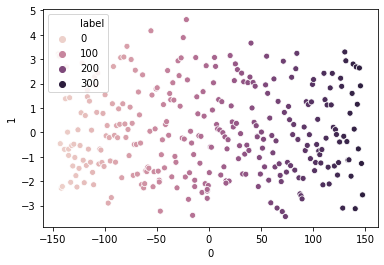

<IPython.core.display.Javascript object>

In [27]:
sns.scatterplot(X_pca[0], X_pca[1], hue=X_pca["label"])

2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?

143    3
10     2
24     2
161    2
97     2
      ..
196    1
197    1
198    1
199    1
0      1
Name: label, Length: 293, dtype: int64


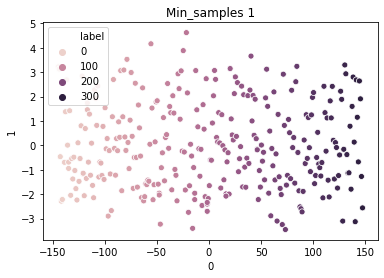

-1    285
 5      3
 1      2
 7      2
 6      2
 4      2
 3      2
 2      2
 0      2
Name: label, dtype: int64


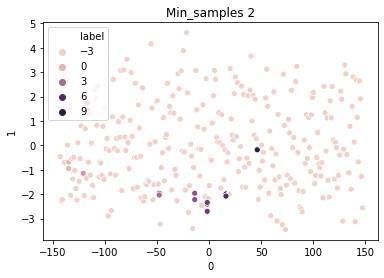

-1    299
 0      3
Name: label, dtype: int64


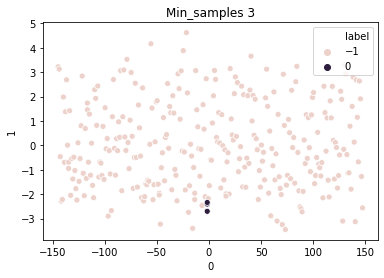

-1    302
Name: label, dtype: int64


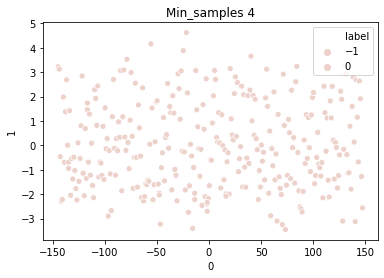

-1    302
Name: label, dtype: int64


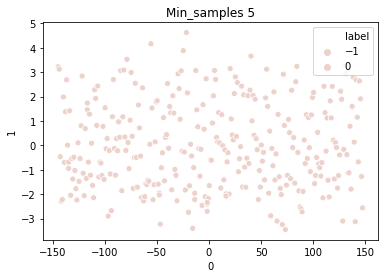

-1    302
Name: label, dtype: int64


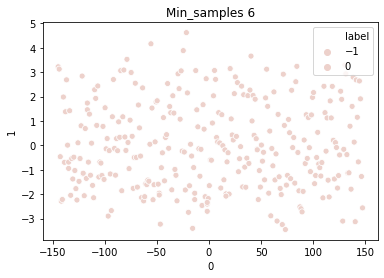

-1    302
Name: label, dtype: int64


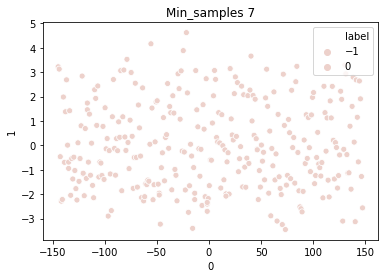

-1    302
Name: label, dtype: int64


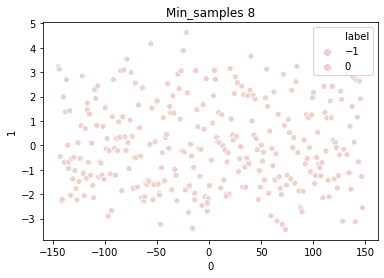

-1    302
Name: label, dtype: int64


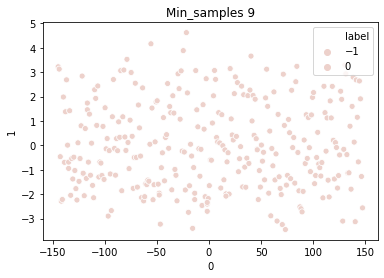

<IPython.core.display.Javascript object>

In [35]:
for min_samp in np.arange(1, 10, 1):
    dbscan = DBSCAN(eps=1, min_samples=min_samp, metric="euclidean")
    dbscan.fit(X_std)
    X_pca["label"] = dbscan.labels_
    print(X_pca["label"].value_counts())
    sns.scatterplot(X_pca[0], X_pca[1], hue=X_pca["label"])
    plt.title("Min_samples {}".format(min_samp))
    plt.show()

143    3
10     2
24     2
161    2
97     2
      ..
196    1
197    1
198    1
199    1
0      1
Name: label, Length: 293, dtype: int64


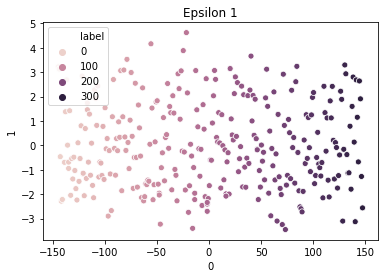

135    5
221    4
81     3
204    2
246    2
      ..
174    1
173    1
172    1
171    1
0      1
Name: label, Length: 276, dtype: int64


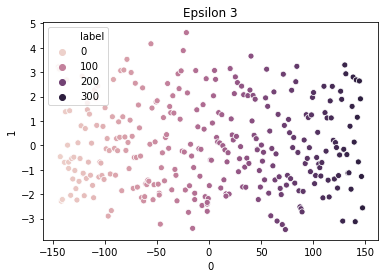

3     24
51    22
15    19
35    19
68    15
      ..
53     1
25     1
24     1
23     1
37     1
Name: label, Length: 76, dtype: int64


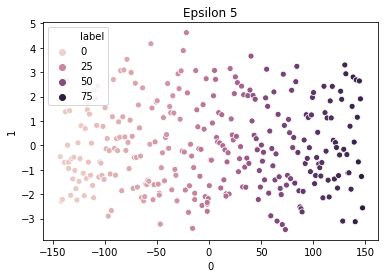

0    302
Name: label, dtype: int64


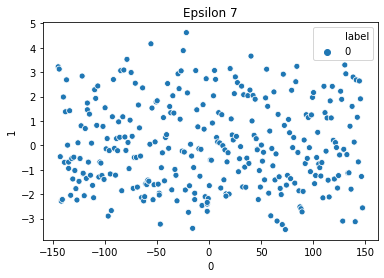

0    302
Name: label, dtype: int64


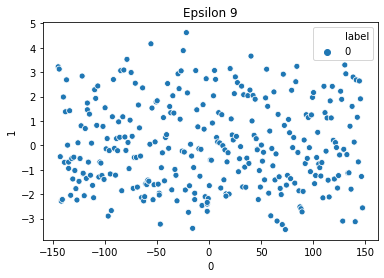

0    302
Name: label, dtype: int64


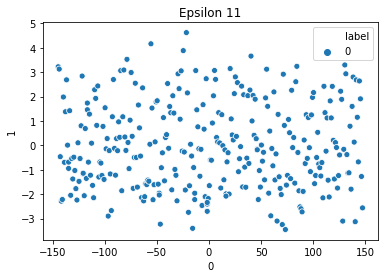

0    302
Name: label, dtype: int64


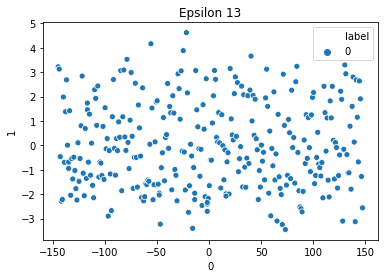

0    302
Name: label, dtype: int64


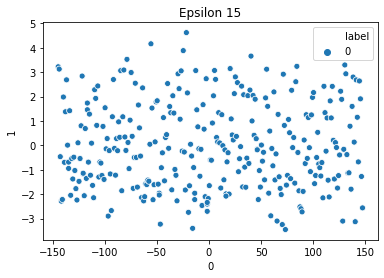

0    302
Name: label, dtype: int64


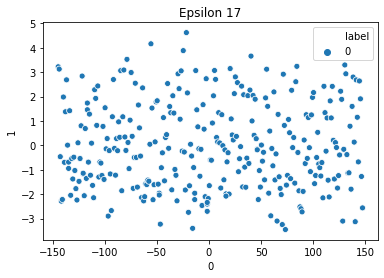

0    302
Name: label, dtype: int64


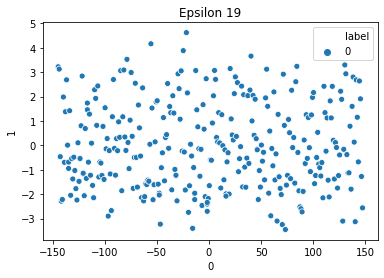

<IPython.core.display.Javascript object>

In [40]:
for epsilon in np.arange(1, 20, 2):
    dbscan = DBSCAN(eps=epsilon, min_samples=1, metric="euclidean")
    dbscan.fit(X_std)
    X_pca["label"] = dbscan.labels_
    print(X_pca["label"].value_counts())
    sns.scatterplot(X_pca[0], X_pca[1], hue=X_pca["label"])
    plt.title("Epsilon {}".format(epsilon))
    plt.show()

As min_samples increases, the number of clusters goes down, with more observations ending up as outliers. This parameter makes forming a cluster more selective. For this data, min_samples 2 is the only value that doesn't assign every observation to it's own cluster, without all the points being labeled as outliers.

As epsilon increases, the number of clusters goes down as well. However, this is by an opposite effect. Large values of epislon allow for distant points to be clustered, until every point is in the same cluster. Compare to min_samples, where too high a value ended in with all outliers.